In [1]:
import pandas as pd
import requests
import numpy as np
import pickle

In [2]:
import csv
import io
import time

In [3]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math, random


In [4]:
# https://api.tiingo.com/tiingo/daily/aapl/prices?startDate=2019-01-02&token=f4a3ff7449de9fc45439d23e204938fc31691077

In [5]:
ticker_names=pd.read_csv('Tickers.csv',index_col=False)
len(ticker_names)

495

In [6]:
def pre_preprocessor(ticker,company_name):    
    CSV_URL ="https://api.tiingo.com/tiingo/daily/"+ticker+"/prices?startDate=2015-01-02&token=419f55d2ac8913929c3054133171783b621cdc06"

    with requests.Session() as s:
        try:
            download = s.get(CSV_URL)
            decoded_content = download.content.decode('utf-8')
            df = pd.read_json(io.StringIO(decoded_content))
            df.to_csv(str(company_name) + '_data.csv', index=False)
        except ValueError as e:
            print(f"ValueError: {e} for {r['TICKER']}")
        except Exception as e:
            print(f"An error occurred: {e} for {r['TICKER']}")
    return


In [7]:
def preprocessing(ticker):
    df=pd.read_csv('Tickers.csv',index_col=False)

    row_numbers = df.index[df['TICKER'] == ticker].tolist()
    try:
        

        if row_numbers:
            row_number = row_numbers[0]
            company_name = df.loc[row_number, 'COMPANY NAME']
            df_pearl=pd.read_csv(str(company_name)+'_data.csv',index_col='date',parse_dates=True)

            df_pearl['high'].plot(figsize=(12,6))
            df_pearl.index = pd.to_datetime(df_pearl.index)
            df_pearl = df_pearl.asfreq('D')
            df_pearl['high'].fillna(method='ffill', inplace=True)
            df_pearl['low'].fillna(method='ffill', inplace=True)
            df_pearl['open'].fillna(method='ffill', inplace=True)
            df_pearl['close'].fillna(method='ffill', inplace=True)
            df_pearl['high'].fillna(method='ffill', inplace=True)
            df_pearl['low'].fillna(method='ffill', inplace=True)
            df_pearl['open'].fillna(method='ffill', inplace=True)
            df_pearl['close'].fillna(method='ffill', inplace=True)
            df_pearl['adjClose'].fillna(method='bfill', inplace=True)
#             df_pearl['adjHigh'].fillna(method='bfill', inplace=True)
#             df_pearl['adjOpen'].fillna(method='bfill', inplace=True)
#             df_pearl['adjLow'].fillna(method='bfill', inplace=True)
            df_pearl['volume'].fillna(method='bfill', inplace=True)
#             df_pearl['adjVolume'].fillna(method='bfill', inplace=True)
#             df_pearl['divCash'].fillna(method='bfill', inplace=True)
#             df_pearl['splitFactor'].fillna(method='bfill', inplace=True)
            res=seasonal_decompose(df_pearl['high'],period=365)
            res.plot();
        else:
            print("golmaal hai bhai sab golmaal hai")
    except:

        if row_numbers:
            row_number = row_numbers[0]
            company_name = df.loc[row_number, 'COMPANY NAME']
            pre_preprocessor(ticker,company_name)
            df_pearl=pd.read_csv(str(company_name)+'_data.csv',index_col='date',parse_dates=True)

            df_pearl['high'].plot(figsize=(12,6))
            df_pearl.index = pd.to_datetime(df_pearl.index)
            df_pearl = df_pearl.asfreq('D')
            df_pearl['high'].fillna(method='ffill', inplace=True)
            df_pearl['low'].fillna(method='ffill', inplace=True)
            df_pearl['open'].fillna(method='ffill', inplace=True)
            df_pearl['close'].fillna(method='ffill', inplace=True)
            df_pearl['adjClose'].fillna(method='bfill', inplace=True)
#             df_pearl['adjHigh'].fillna(method='bfill', inplace=True)
#             df_pearl['adjOpen'].fillna(method='bfill', inplace=True)
#             df_pearl['adjLow'].fillna(method='bfill', inplace=True)
            df_pearl['volume'].fillna(method='bfill', inplace=True)
#             df_pearl['adjVolume'].fillna(method='bfill', inplace=True)
#             df_pearl['divCash'].fillna(method='bfill', inplace=True)
#             df_pearl['splitFactor'].fillna(method='bfill', inplace=True)
            res=seasonal_decompose(df_pearl['high'],period=365)
            res.plot();
        else:
            print("golmaal hai bhai sab golmaal hai")
        df_pearl=df_pearl.drop(['adjHigh','adjLow','adjClose','divCash','splitFactor'],axis=1)
    return df_pearl
        
    

In [8]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# df_pearl=pd.read_csv('Abbott Laboratories_data.csv',index_col='date',parse_dates=True)
# df_pearl.head()

In [10]:
# df_pearl['high'].plot(figsize=(12,6))

In [11]:
# df_pearl.index = pd.to_datetime(df_pearl.index)

# df_pearl = df_pearl.asfreq('D')

In [12]:
# df_pearl['high'].fillna(method='ffill', inplace=True)
# df_pearl['low'].fillna(method='ffill', inplace=True)
# df_pearl['open'].fillna(method='ffill', inplace=True)
# df_pearl['close'].fillna(method='ffill', inplace=True)

In [13]:
# res=seasonal_decompose(df_pearl['high'],period=365)
# res.plot();

# # res.seasonal.plot(figsize=(16,8))

In [14]:
# best_model = auto_arima(df_pearl['high'], seasonal=True, m=7, trace=True)

In [15]:
# ticker='ABT'

In [16]:
# with open(ticker+'_high.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

In [17]:
# best_model_open = auto_arima(df_pearl['open'], seasonal=True, m=7, trace=True)

In [18]:
# best_model_close = auto_arima(df_pearl['close'], seasonal=True, m=7, trace=True)

In [19]:
# best_model_low = auto_arima(df_pearl['low'], seasonal=True, m=7, trace=True)

In [20]:
# with open(ticker+'_open.pkl', 'wb') as f:
#     pickle.dump(best_model_open, f)
# with open(ticker+'_close.pkl', 'wb') as f:
#     pickle.dump(best_model_close, f)
# with open(ticker+'_low.pkl', 'wb') as f:
#     pickle.dump(best_model_low, f)

In [21]:
import matplotlib.pyplot as plt

In [22]:
def value_predictor(best_model,target,df_pearl):
    train_test_split=len(df_pearl)-201
    train_df=df_pearl[:train_test_split]
    test_df=df_pearl[train_test_split:]
    model_open=SARIMAX(df_pearl[target], order=best_model.order,seasonal_order=best_model.seasonal_order)
    res=model_open.fit()
    start=len(train_df)
    end= len(train_df)+len(test_df)+14
    pred=res.predict(start,end).rename('Prediction_'+target)
    plt.figure(figsize=(14, 8))
    ax = test_df[target].plot(legend=True)
    pred.plot(legend=True, ax=ax)
    plt.show()
    plt.clf()
    target_real=test_df[target]
    target_pred=pred
    return target_real,target_pred

In [23]:
def pred_using_ticker(ticker,df_pearl):
    try:
        with open(ticker+'_open.pkl', 'rb') as f:
            best_model_open = pickle.load(f)   
    except:
        best_model_open = auto_arima(df_pearl['open'], seasonal=True, m=7, trace=True)
        with open(ticker+'_open.pkl', 'wb') as f:
            pickle.dump(best_model_open, f)
    try:
        with open(ticker+'_close.pkl', 'rb') as f:
            best_model_close = pickle.load(f)   
    except:
        best_model_close = auto_arima(df_pearl['close'], seasonal=True, m=7, trace=True)
        with open(ticker+'_close.pkl', 'wb') as f:
            pickle.dump(best_model_close, f)
            
    try:
        with open(ticker+'_high.pkl', 'rb') as f:
            best_model_high = pickle.load(f)   
    except:
        best_model_high = auto_arima(df_pearl['high'], seasonal=True, m=7, trace=True)
        with open(ticker+'_high.pkl', 'wb') as f:
            pickle.dump(best_model_high, f)
            
    try:
        with open(ticker+'_low.pkl', 'rb') as f:
            best_model_low = pickle.load(f)   
    except:
        best_model_low = auto_arima(df_pearl['low'], seasonal=True, m=7, trace=True)
        with open(ticker+'_low.pkl', 'wb') as f:
            pickle.dump(best_model_low, f)
    
    open_real,open_pred=value_predictor(best_model_open,'open',df_pearl)
    close_real,close_pred=value_predictor(best_model_close,'close',df_pearl)
    high_real,high_pred=value_predictor(best_model_high,'high',df_pearl)
    low_real,low_pred=value_predictor(best_model_low,'low',df_pearl)
    return open_real,open_pred,close_real,close_pred,high_real,high_pred,low_real,low_pred

In [24]:
def main(ticker='WIT'):
    df_pearl=preprocessing(ticker)
    open_real,open_pred,close_real,close_pred,high_real,high_pred,low_real,low_pred=pred_using_ticker(ticker,df_pearl)
    print(open_real,open_pred,close_real,close_pred,high_real,high_pred,low_real,low_pred)
    return df_pearl

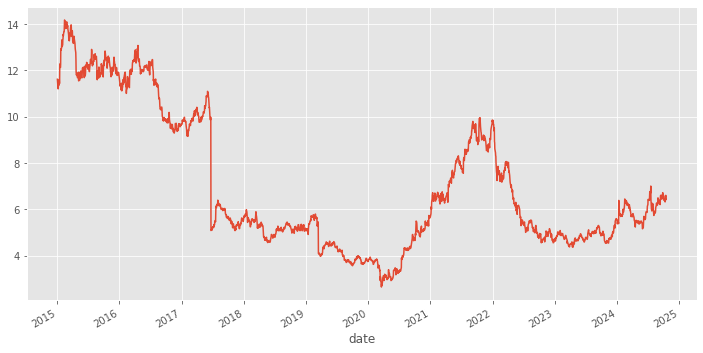

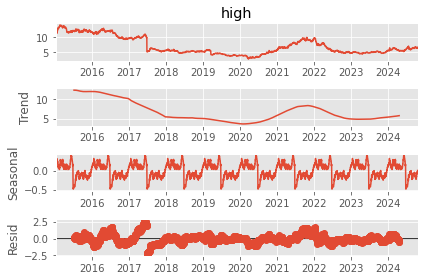

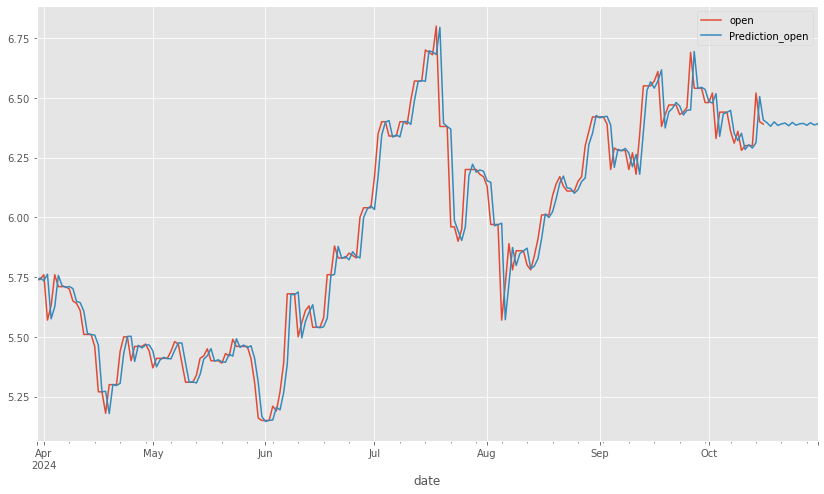

<Figure size 432x288 with 0 Axes>

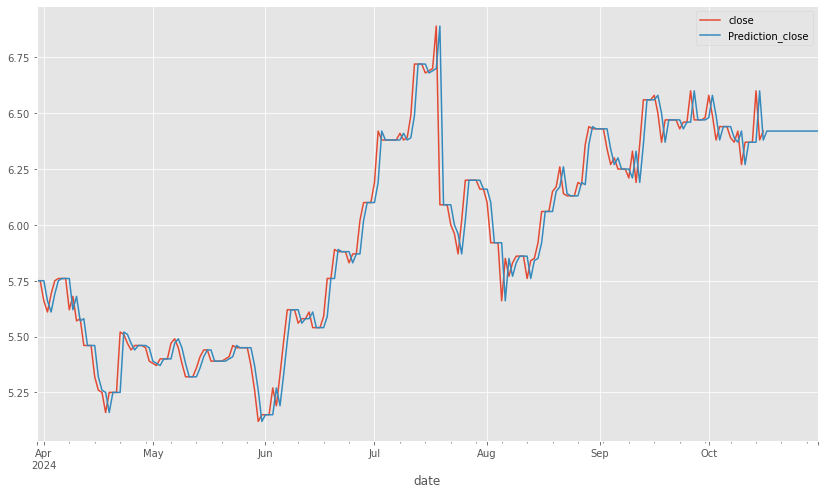

<Figure size 432x288 with 0 Axes>

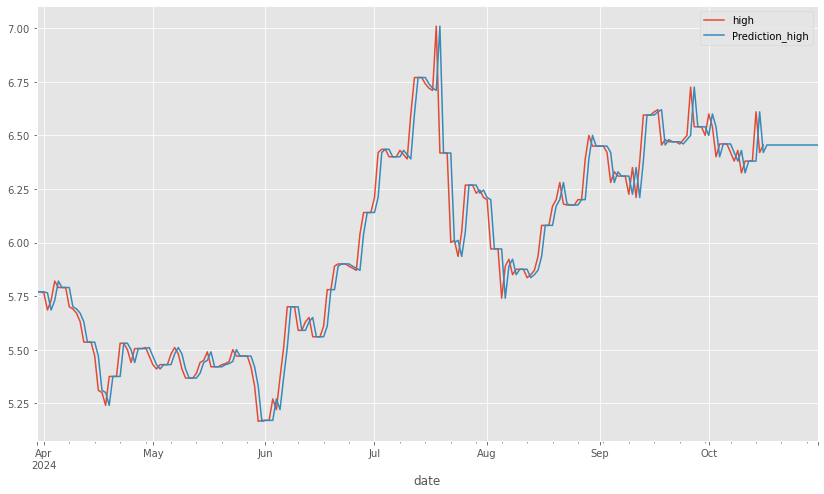

C:\Users\Somtirtha\Anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

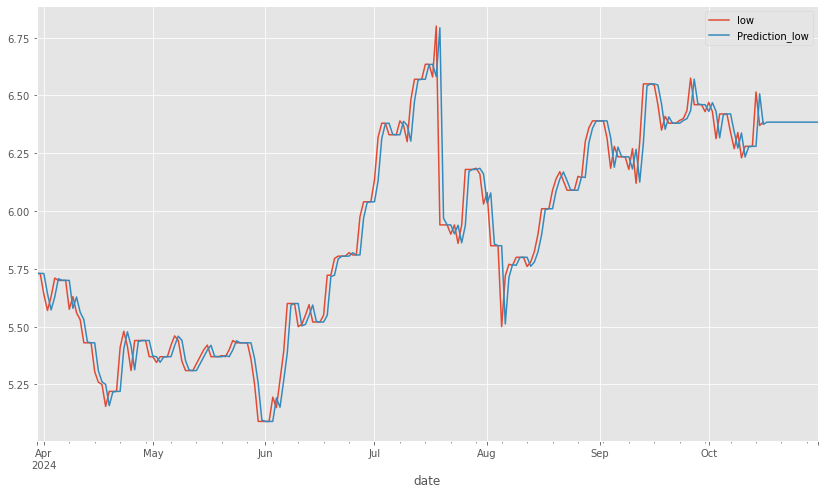

date
2024-03-30 00:00:00+00:00    5.74
2024-03-31 00:00:00+00:00    5.74
2024-04-01 00:00:00+00:00    5.76
2024-04-02 00:00:00+00:00    5.57
2024-04-03 00:00:00+00:00    5.63
                             ... 
2024-10-12 00:00:00+00:00    6.30
2024-10-13 00:00:00+00:00    6.30
2024-10-14 00:00:00+00:00    6.52
2024-10-15 00:00:00+00:00    6.40
2024-10-16 00:00:00+00:00    6.39
Freq: D, Name: open, Length: 201, dtype: float64 2024-03-30 00:00:00+00:00    5.734203
2024-03-31 00:00:00+00:00    5.746913
2024-04-01 00:00:00+00:00    5.734435
2024-04-02 00:00:00+00:00    5.762070
2024-04-03 00:00:00+00:00    5.575401
                               ...   
2024-10-27 00:00:00+00:00    6.392862
2024-10-28 00:00:00+00:00    6.384989
2024-10-29 00:00:00+00:00    6.395647
2024-10-30 00:00:00+00:00    6.386181
2024-10-31 00:00:00+00:00    6.391296
Freq: D, Name: Prediction_open, Length: 216, dtype: float64 date
2024-03-30 00:00:00+00:00    5.75
2024-03-31 00:00:00+00:00    5.75
2024-04-01 00:00:00+0

<Figure size 432x288 with 0 Axes>

In [25]:
df_pearl=main()

In [26]:
# model_open=SARIMAX(df_pearl['open'], order=best_model_open.order,seasonal_order=best_model_open.seasonal_order)
# res=model_open.fit()
# start=len(train_df)
# end= len(train_df)+len(test_df)+14
# pred=res.predict(start,end).rename('Prediction_open')
# ax=test_df['open'].plot(legend=True, figsize=(14,8))
# pred.plot(legend=True)

In [27]:
# model_close=SARIMAX(df_pearl['close'], order=best_model.order,seasonal_order=best_model.seasonal_order)
# res=model_close.fit()
# start=len(train_df)
# end= len(train_df)+len(test_df)+14
# pred=res.predict(start,end).rename('Prediction_close')
# ax=test_df['close'].plot(legend=True, figsize=(14,8))
# pred.plot(legend=True)

In [28]:
# model_low=SARIMAX(df_pearl['low'], order=best_model.order,seasonal_order=best_model.seasonal_order)
# res=model_low.fit()
# start=len(train_df)
# end= len(train_df)+len(test_df)+14
# pred=res.predict(start,end).rename('Prediction_low')
# ax=test_df['low'].plot(legend=True, figsize=(14,8))
# pred.plot(legend=True)

In [29]:
# model=SARIMAX(df_pearl['high'], order=best_model.order,seasonal_order=best_model.seasonal_order)
# res=model.fit()
# start=len(train_df)
# end= len(train_df)+len(test_df)+14
# pred=res.predict(start,end).rename('Prediction')
# ax=test_df['high'].plot(legend=True, figsize=(14,8))
# pred.plot(legend=True)

In [30]:
# model

In [31]:
# from statsmodels.tools.eval_measures import rmse
#     rmse(test_df['high'],pred)

In [32]:
# print(len(df_pearl))

## 

In [33]:
# pred[-15:]

In [34]:
# test_df[-2:]

In [35]:
def LSTM_ALGO(df):
        #Split data into training set and test set
        dataset_train=df.iloc[0:int(0.8*len(df)),:]
        dataset_test=df.iloc[int(0.8*len(df)):,:]
        ############# NOTE #################
        #TO PREDICT STOCK PRICES OF NEXT N DAYS, STORE PREVIOUS N DAYS IN MEMORY WHILE TRAINING
        # HERE N=7
        ###dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
        training_set=df.iloc[:,0:1].values# 1:2, to store as numpy array else Series obj will be stored
        #select cols using above manner to select as float64 type, view in var explorer

        #Feature Scaling
        from sklearn.preprocessing import MinMaxScaler
        sc=MinMaxScaler(feature_range=(0,1))#Scaled values btween 0,1
        training_set_scaled=sc.fit_transform(training_set)
        #In scaling, fit_transform for training, transform for test
        
        #Creating data stucture with 7 timesteps and 1 output. 
        #7 timesteps meaning storing trends from 7 days before current day to predict 1 next output
        X_train=[]#memory with 7 days from day i
        y_train=[]#day i
        for i in range(7,len(training_set_scaled)):
            X_train.append(training_set_scaled[i-7:i,0])
            y_train.append(training_set_scaled[i,0])
        #Convert list to numpy arrays
        X_train=np.array(X_train)
        y_train=np.array(y_train)
        X_forecast=np.array(X_train[-1,1:])
        X_forecast=np.append(X_forecast,y_train[-1])
        #Reshaping: Adding 3rd dimension
        X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))#.shape 0=row,1=col
        X_forecast=np.reshape(X_forecast, (1,X_forecast.shape[0],1))
        #For X_train=np.reshape(no. of rows/samples, timesteps, no. of cols/features)
#         print(X_train,y_train)
        #Building RNN
        from keras.models import Sequential
        from keras.layers import Dense
        from keras.layers import Dropout
        from keras.layers import LSTM
        
        #Initialise RNN
        regressor=Sequential()
        
        #Add first LSTM layer
        regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
        #units=no. of neurons in layer
        #input_shape=(timesteps,no. of cols/features)
        #return_seq=True for sending recc memory. For last layer, retrun_seq=False since end of the line
        regressor.add(Dropout(0.1))
        
        #Add 2nd LSTM layer
        regressor.add(LSTM(units=50,return_sequences=True))
        regressor.add(Dropout(0.1))
        
        #Add 3rd LSTM layer
        regressor.add(LSTM(units=50,return_sequences=True))
        regressor.add(Dropout(0.1))
        
        #Add 4th LSTM layer
        regressor.add(LSTM(units=50))
        regressor.add(Dropout(0.1))
        
        #Add o/p layer
        regressor.add(Dense(units=1))
        
        #Compile
        regressor.compile(optimizer='adam',loss='mean_squared_error')
        
        #Training
        regressor.fit(X_train,y_train,epochs=15,batch_size=32 )
        #For lstm, batch_size=power of 2
        
        #Testing
        ###dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
        real_stock_price=dataset_test.iloc[:,0:1].values
        
        #To predict, we need stock prices of 7 days before the test set
        #So combine train and test set to get the entire data set
        dataset_total=pd.concat((dataset_train['close'],dataset_test['close']),axis=0) 
        
        
        testing_set=dataset_total[ len(dataset_total) -len(dataset_test) -7: ].values
        testing_set=testing_set.reshape(-1,1)
        #-1=till last row, (-1,1)=>(80,1). otherwise only (80,0)
        
        #Feature scaling
        testing_set=sc.transform(testing_set)
        
        #Create data structure
        X_test=[]
#         y_test=[]
        for i in range(7,len(testing_set)):
            X_test.append(testing_set[i-7:i,0])
#             y_test.append(testing_set[i,0])
            #Convert list to numpy arrays
        X_test=np.array(X_test)
#         y_test=np.array(y_test)
        #Reshaping: Adding 3rd dimension
        X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
        
        #Testing Prediction
        predicted_stock_price=regressor.predict(X_test)
        
        #Getting original prices back from scaled values
        predicted_stock_price=sc.inverse_transform(predicted_stock_price)
#         real_stock_price=sc.inverse_transform(y_test.reshape(-1, 1))
        
        
        print(real_stock_price,predicted_stock_price)
        fig = plt.figure(figsize=(20,16),dpi=65)
        plt.plot(real_stock_price,label='Actual Price')  
        plt.plot(predicted_stock_price,label='Predicted Price')
          
        plt.legend(loc=4)
#         plt.show(fig)
        plt.savefig('LSTM.png')
        plt.close(fig)
        
        
        error_lstm = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
        
        
        #Forecasting Prediction
        forecasted_stock_price=regressor.predict(X_forecast)
        
        #Getting original prices back from scaled values
        forecasted_stock_price=sc.inverse_transform(forecasted_stock_price)
        
        lstm_pred=forecasted_stock_price[0,0]
        print()
        print("##############################################################################")
#         print("Tomorrow's ",quote," Closing Price Prediction by LSTM: ",lstm_pred)
#         print("LSTM RMSE:",error_lstm)
        print("##############################################################################")
        return lstm_pred,error_lstm

In [36]:
df_pearl=df_pearl.drop(axis=1,columns=['adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'])
df_pearl.head()

,close,high,low,open,volume,adjClose
date,,,,,,
2015-01-02 00:00:00+00:00,11.33,11.62,11.26,11.52,395528.0,4.032926
2015-01-03 00:00:00+00:00,11.33,11.62,11.26,11.52,744879.0,3.983093
2015-01-04 00:00:00+00:00,11.33,11.62,11.26,11.52,744879.0,3.983093
2015-01-05 00:00:00+00:00,11.19,11.29,11.12,11.29,744879.0,3.983093
2015-01-06 00:00:00+00:00,11.03,11.21,10.88,11.20,364478.0,3.926141


In [37]:
a,b=LSTM_ALGO(df_pearl)

Epoch 1/15
112/112 [==============================] - 24s 37ms/step - loss: 0.0220
Epoch 2/15
112/112 [==============================] - 4s 34ms/step - loss: 0.0017
Epoch 3/15
112/112 [==============================] - 4s 31ms/step - loss: 0.0016
Epoch 4/15
112/112 [==============================] - 3s 30ms/step - loss: 0.0014
Epoch 5/15
112/112 [==============================] - 3s 27ms/step - loss: 0.0015
Epoch 6/15
112/112 [==============================] - 3s 28ms/step - loss: 0.0015
Epoch 7/15
112/112 [==============================] - 3s 29ms/step - loss: 0.0014
Epoch 8/15
112/112 [==============================] - 4s 32ms/step - loss: 0.0013
Epoch 9/15
112/112 [==============================] - 3s 29ms/step - loss: 0.0014
Epoch 10/15
112/112 [==============================] - 4s 33ms/step - loss: 0.0012
Epoch 11/15
112/112 [==============================] - 4s 35ms/step - loss: 0.0012
Epoch 12/15
112/112 [==============================] - 4s 33ms/step - loss: 0.0012
Epoch 13/15


1/1 [==============================] - 0s 41ms/step

##############################################################################
##############################################################################


In [38]:
def LIN_REG_ALGO(df):
        #No of days to be forcasted in future
        forecast_out = int(7)
        #Price after n days
        df['Close after n days'] = df['close'].shift(-forecast_out)
        #New df with only relevant data
        df_new=df[['close','Close after n days']]

        #Structure data for train, test & forecast
        #lables of known data, discard last 35 rows
        y =np.array(df_new.iloc[:-forecast_out,-1])
        y=np.reshape(y, (-1,1))
        #all cols of known data except lables, discard last 35 rows
        X=np.array(df_new.iloc[:-forecast_out,0:-1])
        #Unknown, X to be forecasted
        X_to_be_forecasted=np.array(df_new.iloc[-forecast_out:,0:-1])
        
        #Traning, testing to plot graphs, check accuracy
        X_train=X[0:int(0.8*len(df)),:]
        X_test=X[int(0.8*len(df)):,:]
        y_train=y[0:int(0.8*len(df)),:]
        y_test=y[int(0.8*len(df)):,:]
        
        # Feature Scaling===Normalization
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        X_to_be_forecasted=sc.transform(X_to_be_forecasted)
        
        #Training
        clf = LinearRegression(n_jobs=-1)
        clf.fit(X_train, y_train)
        
        #Testing
        y_test_pred=clf.predict(X_test)
        y_test_pred=y_test_pred*(1.04)
        import matplotlib.pyplot as plt2
        fig = plt2.figure(figsize=(20,16),dpi=65)
        plt2.plot(y_test,label='Actual Price' )
        plt2.plot(y_test_pred,label='Predicted Price')
        
        plt2.legend(loc=4)
        plt2.savefig('LR.png')
        plt2.close(fig)
        
        error_lr = math.sqrt(mean_squared_error(y_test, y_test_pred))
        
        
        #Forecasting
        forecast_set = clf.predict(X_to_be_forecasted)
        forecast_set=forecast_set*(1.04)
        mean=forecast_set.mean()
        lr_pred=forecast_set[0,0]
        print()
        print("##############################################################################")
#         print("Tomorrow's ",quote," Closing Price Prediction by Linear Regression: ",lr_pred)
#         print("Linear Regression RMSE:",error_lr)
        print("##############################################################################")
        return df, lr_pred, forecast_set, mean, error_lr

In [39]:
LIN_REG_ALGO(df_pearl)

NameError: name 'LinearRegression' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
!pip install scikit-learn